<br>    
<img src="https://uniandes.edu.co/sites/default/files/logo-uniandes.png" width=200 height="100" align="left">
<h1 style="text-align:center;">IELE 4922</h1>
<h3 style='text-align: right;'> Departamento de Ingeniería Eléctrica y Electrónica &emsp;<br> Facultad de Ingeniería &emsp; <br>
     Universidad de los Andes &emsp; <br>
     Taller # 4 &emsp; <br>
</h3>
&emsp;<b>Integrante 1:</b> Mauricio Ricardo Delgado Quintero - 201712801
<br>
&emsp;<b>Integrante 2:</b> Juan Camilo Pico Garrido - 201731674
<br>

# Taller 4: TD - Sarsa y Q-Learning

## Algoritmos a implementar
En este taller usted deberá realizar su propia implementaación de los siguientes algoritmos de diferencias temporales (TD) en su versión tabular:
\begin{itemize}
\item \textbf{Sarsa} (control \textit{on-policy}) 
\item \textbf{Q-Learning}  (control \textit{off-policy})
\end{itemize}
Para esto, puede hacer uso de librerias para el manejo de matrices y arreglos como \textbf{numpy}, pero la implementación del algoritmo deberá ser desarrollada en su totalidad. Adicionalmente, se recomienda que su implementación sea lo suficientemente genérica para que pueda utilizarse en los dos entornos propuestos para su evaluación. Estos, ambos entornos estándar de \textit{gym}, se presentan a continuación:  

## 1. \textit{Cliff Walking Enviroment} [<font color='green'>1</font>,\textbf{Ch. 6}] 
<img src="Imagen.jpg" width=400>
Considere nuevamente el entorno propuesto en [<font color='green'>1</font>,\textbf{Ch. 6}], conocido como \textit{Cliff Walking Enviroment} (veáse figura <font color='red'>1</font>). Este es un simple \textit{gridworld}, en donde un agente debe reconocer el borde de un risco para poder llegar a su objetivo. Cada movimiento del agente (arriba, abajo, derecha o izquierda) resulta en una recompensa de $-1$, excepto si cae en la región que representa el precipicio (\textit{The Cliff}), en cuyo caso la recompensa será de $-100$. Esta es una tarea episódica y cada que el agente llega al objetivo o cae al precipicio termina al episodio. Para esto, haga uso de la clase en python \textit{CliffWalkingEnv} del taller pasado. Esta contempla la variación adicional del viento que lo empuja hacia el risco con probabilidad de $p_{\text{wind}}$ cada que se realiza un movimiento. 


a) Resuelva el problema con la probabilidad de viento por defecto ($p_{\text{wind}}=0.1$). Grafique la recompensa promedio de cada episodio de cada episodio durante el entrenamiento tanto para \textbf{Sarsa} como para \textbf{Q-Learning} (Promedie el resultado de al menos 20 entrenamientos). Puede suavizar esta curva con un promedio móvil para mejorar su movilización.


In [1]:
# Se importan las librerias y el entorno
from cliffwalking import CliffWalkingEnv
import numpy as np
import pandas as pd
import copy
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Algoritmo de selección $\epsilon$-greedy
Se crea una función para seleccionar la acción de manera $\epsilon-greedy$

In [2]:
def e_greedy(values, epsilon):
    # Generar número aleatorio
    r = np.random.random()
    # Caso completamente aleatorio
    if r < epsilon:
        a = np.random.choice(values.index)
    # Caso greedy
    else:
        a = values.idxmax()
    # Retornar accion
    return(a)

# Funciones para el problema de Cliff Walking

### SARSA 
<img src="SARSA.jpg" width=400>

In [3]:
def sarsa(env, S, A, episodes, alpha, gamma, epsilon, seed):
    # Semilla para generar números pseudoaleatorios
    np.random.seed(seed)
    
    # Resetear ambiente
    env.reset()
    
    # Inicializar Q(S,A)
    Q = np.zeros((len(S), len(A)))
    Q = pd.DataFrame(Q, columns=A, index=S)
    
    # Inicializar lista de retornos
    retornos = np.zeros(episodes)
    
    for i in range(episodes):

        # Inicializar estado
        state = env.reset()
        
        # Escoger A de forma greedy
        action = e_greedy(Q.loc[state,:], epsilon)
        
        done = False
        
        while not done:   
            
            # Se da un paso en la acción seleccionada
            new_state, reward, done, info = env.step(action)

            # Actualizar retorno
            retornos[i] = retornos[i] + reward

            # Elegir nueva acción
            new_action = e_greedy(Q.loc[new_state,:], epsilon)

            # Actualizar Q
            Q.loc[state, action] = Q.loc[state, action] + alpha*(reward+gamma*Q.loc[new_state, new_action]-Q.loc[state, action])

            # Actualizar estado y acción
            state = copy.deepcopy(new_state)
            action = copy.deepcopy(new_action)    
            
    # Retornar retorno de cada episodio
    return(retornos, Q)
            

### Q-Learning 
<img src="Q-Learning.jpg" width=400>

In [4]:
def qlearning(env, S, A, episodes, alpha, gamma, epsilon, seed):
    # Semilla para generar números pseudoaleatorios
    np.random.seed(seed)
    
    # Resetear ambiente
    env.reset()
    
    # Inicializar Q(S,A)
    Q = np.zeros((len(S), len(A)))
    Q = pd.DataFrame(Q, columns=A, index=S)
    
    # Inicializar lista de retornos
    retornos = np.zeros(episodes)
    
    for i in range(episodes):

        # Inicializar estado
        state = env.reset()
        
        done = False
        
        while not done:
              
            # Escoger A de forma greedy
            action = e_greedy(Q.loc[state,:], epsilon)

            # Se da un paso en la acción seleccionada
            new_state, reward, done, info = env.step(action)

            # Actualizar retorno
            retornos[i] = retornos[i] + reward

            # Actualizar Q
            Q.loc[state, action] = Q.loc[state, action] + alpha*(reward+gamma*Q.loc[new_state, :].max()-Q.loc[state, action])

            # Actualizar estado y acción
            state = copy.deepcopy(new_state)   
            
    # Retornar retorno de cada episodio
    return(retornos, Q)

### Entrenar algoritmos

En este punto, se creó una función para entrenar varias veces usando \textbf{SARSA} o \textbf{Q-Learning} respectivamente. De esta manera, lo que se busca es que esta función retorne los retornos promedio y la función de valor $Q$ para el último entrenamiento. Lo anterior, dado que se intentó retornar la función de valor $Q$ promediada a través de los entrenamientos pero se encontró que esta matriz ocasionaba que se tomaran decisiones greedy extrañas en varias posiciones, especialmente usando \textbf{SARSA}, por ejemplo: moverse a la izquierda en la esquina superior izquierda del entorno, lo cual no tiene mucho sentido. 

In [5]:
def entrenar(alg, n, env, S, A, episodes, alpha, gamma, epsilon, seed):
    
    # Inicializar el retorno promedio y la matriz Q promedio de los entrenamientos
    retorno_prom = np.zeros(episodes)
    Q_prom = np.zeros((len(S), len(A)))
    Q_prom = pd.DataFrame(Q_prom, columns=A, index=S)
    
    for i in range(n):
        clear_output(wait=True)
        print("Entrenamiento: "+str(i+1))
        
        if alg=="sarsa":
            retorno, Q = sarsa(env, S, A, episodes, alpha, gamma, epsilon, seed=i) 
        elif alg=="qlearning":
            retorno, Q = qlearning(env, S, A, episodes, alpha, gamma, epsilon, seed=i)
        
        # Actualizar el retorno y la Q promedio de forma incremental
        retorno_prom = retorno_prom + (1/(i+1))*(retorno-retorno_prom)
        Q_prom = Q_prom + (1/(i+1))*(Q-Q_prom)
        
    return(retorno_prom, Q)

Ahora se creo una función para graficar los retornos promedio.

In [6]:
def graficar_retornos(values_sarsa, values_q, m, movil=True):
    
    # Lineas de sarsa

    plt.figure(figsize=(15, 5))
    # Inicializar vector con promedio movil con ventana m
    promedio_movil_sarsa = np.zeros(len(values_sarsa))
    # Calcular promedio movil
    for i in range(m-1, len(promedio_movil_sarsa)):
        promedio_movil_sarsa[i] = values_sarsa[i-(m-1):i+1].mean()
    
    # Graficar retorno de sarsa
    plt.plot(values_sarsa, linestyle='--', linewidth=0.1, color="red")
    # Graficar promedio movil del retorno de sarsa
    if movil:
        plt.plot(promedio_movil_sarsa, color='red')
    
    # Lineas de qlearning
    
    # Inicializar vector con promedio movil con ventana m
    promedio_movil_q = np.zeros(len(values_q))
    # Calcular promedio movil
    for i in range(m-1, len(promedio_movil_q)):
        promedio_movil_q[i] = values_q[i-(m-1):i+1].mean()
    
    # Graficar retorno de qlearning
    plt.plot(values_q, linestyle='--', linewidth=0.1, color="blue")
    # Graficar promedio movil del retorno de qlearning
    if movil:
        plt.plot(promedio_movil_q, color='blue')
    
    # Graficar leyendas de las curvas
    if movil:
        plt.legend(("Recompensa SARSA", "Recompensa con PM SARSA", "Recompensa Q-Learning", "Recompensa con PM Q-Learning"))
    else:
        plt.legend(("Recompensa SARSA", "Recompensa Q-Learning"))

A continuación, se creo una función para gráficar la política de cliff walking.

In [7]:
def graficar_politica(Q, rows, cols):
    
    # Crear mapa del cliff
    mapa = np.zeros((rows, cols), dtype=object)
    mapa[:] = '- '
    mapa[0, 1:-1] = 'X '
    mapa[0,0] = 'o '
    
    
    for s in Q.index:
        
        # Definir acción greedy en cada posición
        action = Q.loc[s,:].idxmax()
        
        # Definir dirección
        if action == 0: #right
            action = "->"
        elif action == 1: #down
            action = "! "
        elif action == 2: #left
            action = "<-"
        elif action == 3: #up
            action = "¡ "
        else:
            raise Exception("Invalid action.")
        
        # Editar el mapa con la dirección en cada posición
        if s==0:
            mapa[0,0] = action
        elif s>=10:
            x = int(str(s)[1:])
            y = int(str(s)[:1])
            mapa[y,x]=action
    
    # Imprimir el mapa
    print(np.flip(mapa,0))
            

Finalmente, se creó una función para ver la animación de la política de cliff walking.

In [8]:
def cliff_animation(Q, env):
    state = env.reset()
    done = False
    while not done:
        action = Q.loc[state,:].idxmax()
        state, r, done, info = env.step(action)
        env.render()
        time.sleep(0.6)
        clear_output(wait=True)
    #env.close()

### Implementación de los algoritmos de \textit{Cliff Walking}  ($p_{\text{wind}}=0.1$)
En primer lugar se realizó uso de las funciones definidas anteriormente para entrenar el algoritmo de \textit{Cliff Walking} 20 veces con una($p_{\text{wind}}=0.1$) para \textit{SARSA} y \textit{Q-Learning} durante 100 episodios.  

In [9]:
cliff = CliffWalkingEnv(p_wind=0.1)

In [10]:
resultado_sarsa, Q_sarsa = entrenar(alg="sarsa",n=20, env=cliff, S=np.arange(40), 
                           A=np.arange(4), episodes=100, alpha=0.9, gamma = 1, 
                           epsilon=0.05, seed=10)

Entrenamiento: 20


In [11]:
resultado_qlearning, Q_qlearning = entrenar(alg="qlearning",n=20, env=cliff, S=np.arange(40), 
                              A=np.arange(4), episodes=100, alpha=0.9, gamma=1,
                              epsilon=0.05, seed=10)

Entrenamiento: 20


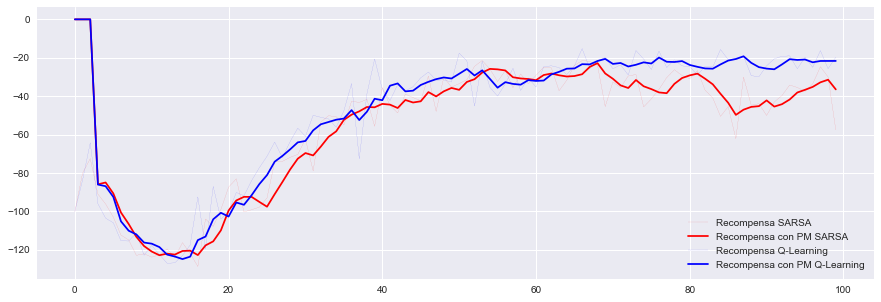

In [12]:
graficar_retornos(resultado_sarsa,resultado_qlearning, m=4)

De este modo, se puede ver que \textit{Q-Learning} tiene un mejor desempeño respecto a \textit{SARSA} la mayoria de los veces. Lo anterior, tiene sentido ya que se trata de un algoritmo \textit{off-policy} lo que hace que converga a una política óptima más rápido.

Ahora bien, se gráfica la política y la animación de \textit{Cliff Walking} para \textit{SARSA} y \textit{Q-Learning} 

In [13]:
graficar_politica(Q_sarsa, rows=4, cols=10)

[['! ' '! ' '! ' '->' '->' '->' '->' '->' '! ' '! ']
 ['->' '->' '->' '->' '¡ ' '¡ ' '¡ ' '->' '->' '! ']
 ['¡ ' '<-' '¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '->' '! ']
 ['¡ ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' '- ']]


In [14]:
cliff_animation(Q_sarsa, cliff)

[['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'o']]


In [15]:
graficar_politica(Q_qlearning, rows=4, cols=10)

[['->' '->' '->' '->' '->' '->' '->' '->' '->' '! ']
 ['->' '¡ ' '->' '->' '->' '->' '->' '->' '->' '! ']
 ['¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '->' '! ']
 ['¡ ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' '- ']]


In [16]:
cliff_animation(Q_qlearning, cliff)

[['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'o']]


En este caso en particular para ambos algoritmos el agente llega a la meta. Sin embargo, pareciera que con Q-Learning llega más rápido.

### Implementación de los algoritmos de \textit{Cliff Walking}  ($p_{\text{wind}}=0.3$)
En primer lugar se realizó uso de las funciones definidas anteriormente para entrenar el algoritmo de \textit{Cliff Walking} 20 veces con una($p_{\text{wind}}=0.3$) para \textit{SARSA} y \textit{Q-Learning} durante 100 episodios.  

In [17]:
cliff = CliffWalkingEnv(p_wind=0.3)

In [18]:
resultado_sarsa, Q_sarsa = entrenar(alg="sarsa",n=20, env=cliff, S=np.arange(40), 
                           A=np.arange(4), episodes=100, alpha=0.9, gamma = 1, 
                           epsilon=0.05, seed=10)

Entrenamiento: 20


In [19]:
resultado_qlearning, Q_qlearning = entrenar(alg="qlearning",n=20, env=cliff, S=np.arange(40), 
                              A=np.arange(4), episodes=100, alpha=0.9, gamma=1,
                              epsilon=0.05, seed=10)

Entrenamiento: 20


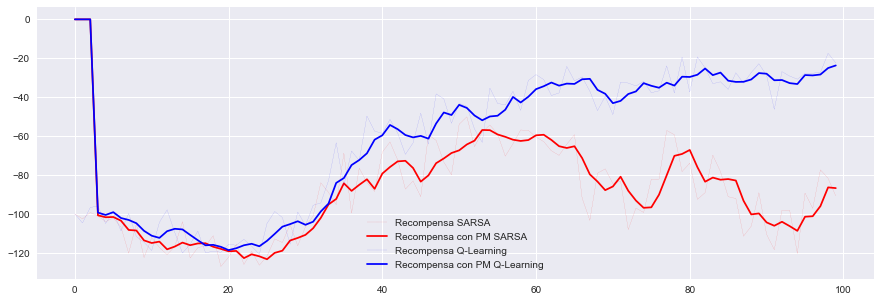

In [20]:
graficar_retornos(resultado_sarsa,resultado_qlearning, m=4)

En este caso, se puede ver que para $p_{\text{wind}}=0.3$ el comportamiento es mejor para \textit{Q-Learning} y hay una mayor diferencia entre la recompensa obtenida con \textit{Q-Learning} y con \textit{SARSA}. Lo anterior, ya que al aumentar la probabilidad de viento, es más probable que el agente se caiga.  

In [21]:
graficar_politica(Q_sarsa, rows=4, cols=10)

[['->' '->' '->' '->' '->' '->' '->' '->' '->' '! ']
 ['¡ ' '¡ ' '¡ ' '->' '->' '¡ ' '->' '->' '->' '! ']
 ['¡ ' '<-' '¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '->' '! ']
 ['¡ ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' '- ']]


In [22]:
cliff_animation(Q_sarsa, cliff)

[['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'o']]


In [23]:
graficar_politica(Q_qlearning, rows=4, cols=10)

[['->' '->' '->' '->' '! ' '->' '->' '¡ ' '->' '! ']
 ['->' '¡ ' '->' '->' '->' '->' '->' '->' '->' '! ']
 ['¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '¡ ' '->' '! ']
 ['¡ ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' 'X ' '- ']]


In [24]:
cliff_animation(Q_qlearning, cliff)

[['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'o']]


Finalmente, se muestra la política y la animación para el ambiente de \textit{Cliff Walking} con una $p_{\text{wind}}=0.3$. Se puede ver que al igual que en el caso anterior, el agente llega a la meta tanto con \textit{SARSA} como con \textit{Q-Learning}. Sin embargo, al ser \textit{Q-Learning} una politica \textit{off-policy} tiene un mejor desempeño.

# 2. CartPole 

<img src="Cart.jpg" width=400>
Considere ahora, el entorno de \textit{gym} conocida como el \textit{CartPole} (véase figura <font color='red'>2</font>). En este entorno estándar de \textbf{OpenAI}, se tiene un carro con una pequeña pértiga unida a su centro y el objetivo de este agente es que el carro logre mantener la pértiga balanceada hacia arriba el mayor tiempo posible.

Para esto, el agente puede tomar solo dos \textbf{acciones}: 
\begin{itemize}
\item Moverse a la izquierda (0).
\item Moverse a la derecha (1).
\end{itemize}
Y la información que tiene del entorno (observaciones) está dada por 4 variables en la tabla <font color='red'>1</font>.
$$
\begin{aligned}
&\begin{array}{|c|c|c|c|}
\hline \hline \text{Num} & \text {Observación} & \text {Min} & \text {Máx} \\
\hline 0 & \text{Cart Position} & -2,4 & 2,4\\
\hline
\hline 1 & \text{Cart Velocity} & -\infty & \infty \\
\hline
\hline 2 & \text{Pole Angle} & -41,8° & 41,8° \\ 
\hline
\hline 3 & \text{Pole Velocity At Tip} &  -\infty & \infty \\
\end{array}
\end{aligned}
$$
$$
\text {Cuadro 1: Observaciones en el entorno de CartPole}\\
$$

La recompensa es de 1 por cada \textit{step} del episodio y este termina cuando el ángulo de la pértiga es mayor o menor a 12°, el carro se sale de los límites del entorno o el episodio dura más de 200 \textit{steps}. Para mayor información del entorno puede referirse a la [documentación de CartPole v0](https://gym.openai.com/docs/).

Para resolver este problema con sus implementaciones de \textbf{Sarsa} y \textbf{Q-Learning} usted debe discretizar las observaciones del entorno. Considere dos aproximaciones:
\begin{itemize}
\item Haga una discretización de las observaciones del entorno con pocos intervalos para obtener los estados (Procure que el tamaño del espacio de estados sea menor a 200 estados).
\item Haga una discretización de las observaciones del entorno con una gran cantidad de intervalos para obtener los estados (Procure que el tamaño del espacio de estados sea mayor a 2000 estados).
\end{itemize}

Para ambas aproximaciones explique detalladamente como discretizó  las observaciones (intervalos que definió para cada una de las observaciones) y como construyó los estados.De igual forma, muestre los resultados que se obtuvieron con ambos algoritmos (gráfica de la evolución de la recompensa a través del tiempo y video de la política resultante), comente y análice dichos resultados y discuta las ventajas y desventajas de  las dos aproximaciones propuestas.

### SARSA para CartPole

In [25]:
import gym
# Objeto del entorno
cart_env = gym.make('CartPole-v0')

C:\Users\Mauricio\AppData\Roaming\Python\Python39\site-packages\gym\envs\registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(


En primer lugar, se realizó una simulación del entorno para obtener los valores comunes de las observaciones (espacio de estados) para discretizar el espacio de estados.

In [26]:
pos = list()
vel = list()
angulo = list()
vel_punta = list()

for i in range(1000):
    observation = cart_env.reset()
    done = False
    while not done:
        obs, r, done, info = cart_env.step(cart_env.action_space.sample())
        pos.append(obs[0])
        vel.append(obs[1])
        angulo.append(obs[2])
        vel_punta.append(obs[3])

C:\Users\Mauricio\AppData\Local\Temp/ipykernel_17444/2634356802.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


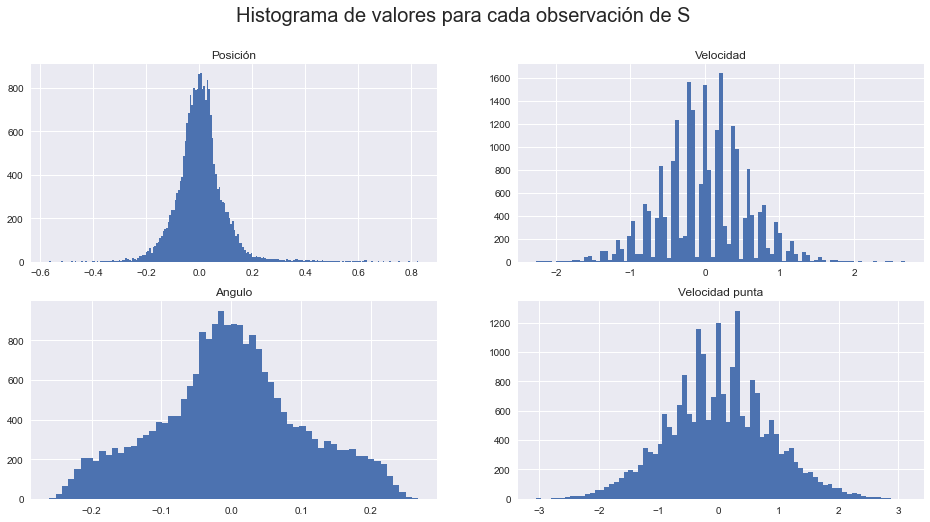

In [27]:
fig, axs = plt.subplots(2,2, figsize=(16,8))
fig.suptitle('Histograma de valores para cada observación de S', size=20)
axs[(0,0)].hist(pos, bins='auto')
axs[(0,0)].set_title("Posición")
axs[(0,1)].hist(vel, bins='auto')
axs[(0,1)].set_title("Velocidad")
axs[(1,0)].hist(angulo, bins='auto')
axs[(1,0)].set_title("Angulo")
axs[(1,1)].hist(vel_punta, bins='auto')
axs[(1,1)].set_title("Velocidad punta")
fig.show()

En primer lugar, se hicieron 1000 simulaciones del entorno para ver la distribución de la posición, velocidad, ángulo y velocidad de la punta. De este modo, se crearon algunos rangos para cada una de las variables anteriormente mencionadas de acuerdo a lo que se pudo evidenciar en los histogramas.

Rangos para crear el primer espacio de estados con tamaño menor a 200

In [28]:
rangos1 = dict()
rangos1['pos'] = [-0.1, 0.1]
rangos1['vel'] = [-1, 0, 1]
rangos1['angulo'] = [-0.1, 0, 0.1]
rangos1['vel_punta'] = [-1, 0, 1]
rangos1

{'pos': [-0.1, 0.1],
 'vel': [-1, 0, 1],
 'angulo': [-0.1, 0, 0.1],
 'vel_punta': [-1, 0, 1]}

De esta manera para posición los rangos serían: $\{[-2.4,-0,1),[-0.1,0.1),(0.1,2.4)\}$.

Para velocidad serían: $\{(-\infty,-1),[-1,0),[0,1),[1,\infty)\}$.

Para el ángulo serían $\{(-41.8°,-0.1),[-0.1,0),[0,0.1),[0.1,41.8°)\}$.

Para la velocidad de la punta serían: $\{(-\infty,-1),[-1,0),[0,1),[1,\infty)\}$.

In [30]:
estados1 = list()
for i in range(3):
    for j in range(4):
        for k in range(4):
            for l in range(4):
                estados1.append(str(i)+str(j)+str(k)+str(l))
len(estados1)

192

Rangos para crear el segundo espacio de estados con tamaño mayor a 2,000. En particular, en este caso, se crearon 8 rangos para la posición y 10 para la velocidad, ángulo y velocidad de la punta de acuerdo a los quantiles de los valores obtenidos en la simulación. Lo anterior, con el fin de tener 8,000 estados y observar un escenario con menos de 200 estados y uno con más de 2,000.

In [31]:
rangos2 = dict()
rangos2['pos'] = np.quantile(pos, np.linspace(0,1,9)[1:-1])
rangos2['vel'] = np.quantile(vel, np.linspace(0,1,11)[1:-1])
rangos2['angulo'] = np.quantile(angulo, np.linspace(0,1,11)[1:-1])
rangos2['vel_punta'] = np.quantile(vel_punta, np.linspace(0,1,11)[1:-1])
rangos2

{'pos': array([-0.08462366, -0.04490489, -0.02071183,  0.00087411,  0.02222192,
         0.0447446 ,  0.08901813]),
 'vel': array([-0.74937908, -0.42732623, -0.2407286 , -0.1683203 ,  0.00184654,
         0.16550553,  0.23891602,  0.42418123,  0.74308537]),
 'angulo': array([-0.14273695, -0.08556763, -0.04750016, -0.02369801, -0.00189139,
         0.02084295,  0.0460342 ,  0.08415077,  0.1444493 ]),
 'vel_punta': array([-1.09205805, -0.68454822, -0.41960543, -0.24108904,  0.00218628,
         0.24554915,  0.41875476,  0.69436445,  1.11665562])}

In [32]:
estados2 = list()

for i in range(8):
    for j in range(10):
        for k in range(10):
            for l in range(10):
                estados2.append(str(i)+str(j)+str(k)+str(l))
len(estados2)

8000

Se creó una función para intentar ajustar epsilon con decaimiento exponencial. Sin embargo, no hubo una mejora, por lo que finalmente no se hizo uso de la misma.

In [33]:
def fun_epsilon(x, episodes):
    return np.exp(-x/(episodes/5))

### SARSA para el ambiente del CartPole
Vale la pena resaltar que la recompensa es -100 si se cae y 0 si no se cae. Y se considera como retornos el número de pasos sin caerse.

In [34]:
def sarsa_cart(env, S, rangos, A, episodes, alpha, gamma, epsilon, seed):
    # Semilla para generar números pseudoaleatorios
    np.random.seed(seed)
    
    # Resetear ambiente
    env.reset()
    
    # Inicializar Q(S,A)
    Q = np.zeros((len(S), len(A)))
    Q = pd.DataFrame(Q, columns=A, index=S)
    
    # Inicializar lista de retornos
    retornos = np.zeros(episodes)
    
    for i in range(episodes):

        # Inicializar estado
        s0 = env.reset()
        state = str(np.digitize(s0[0], rangos['pos'])) + str(np.digitize(s0[1], rangos['vel'])) + str(np.digitize(s0[2], rangos['angulo'])) + str(np.digitize(s0[3], rangos['vel_punta']))
        
        # Escoger A de forma greedy
        action = e_greedy(Q.loc[state,:], epsilon)
        
        done = False
        k = 0
        while not done:
            
            # Actualizar número de pasos sin caerse
            k = k+1
            
            # Se da un paso en la acción seleccionada
            new_state, reward, done, info = env.step(action)
            
            # Definir recompensa (0 si no se cae, -100 cuando se cae)
            if done:
                reward = -100
                # Actualizar retornos (entendido como la recompensa promedio)
                retornos[i] = k
            else:
                reward = 0
                
            # Discretizar el estado
            new_state = str(np.digitize(new_state[0], rangos['pos'])) + str(np.digitize(new_state[1], rangos['vel'])) + str(np.digitize(new_state[2], rangos['angulo'])) + str(np.digitize(new_state[3], rangos['vel_punta']))

            # Elegir nueva acción
            new_action = e_greedy(Q.loc[new_state,:], epsilon)

            # Actualizar Q
            Q.loc[state, action] = Q.loc[state, action] + alpha*(reward+gamma*Q.loc[new_state, new_action]-Q.loc[state, action])

            # Actualizar estado y acción
            state = copy.deepcopy(new_state)
            action = copy.deepcopy(new_action)    
            
    # Retornar retorno de cada episodio
    return(retornos, Q)
            

### Q-Learning para el ambiente de CartPole 
Vale la pena resaltar que la recompensa es -100 si se cae y 0 si no se cae. Y se considera como retornos el número de pasos sin caerse.

In [35]:
def qlearning_cart(env, S, rangos, A, episodes, alpha, gamma, epsilon, seed):
    # Semilla para generar números pseudoaleatorios
    np.random.seed(seed)
    
    # Resetear ambiente
    env.reset()
    
    # Inicializar Q(S,A)
    Q = np.zeros((len(S), len(A)))
    Q = pd.DataFrame(Q, columns=A, index=S)
    
    # Inicializar lista de retornos
    retornos = np.zeros(episodes)
    
    for i in range(episodes):
        
        # Inicializar estado
        s0 = env.reset()
        state = str(np.digitize(s0[0], rangos['pos'])) + str(np.digitize(s0[1], rangos['vel'])) + str(np.digitize(s0[2], rangos['angulo'])) + str(np.digitize(s0[3], rangos['vel_punta']))
        
        done = False
        
        k = 0
        while not done:
            
            # Actualizar número de pasos sin caerse
            k = k+1
            
            # Escoger A de forma greedy
            #action = e_greedy(Q.loc[state,:], fun_epsilon(i, episodes))
            action = e_greedy(Q.loc[state,:], epsilon)
            # Se da un paso en la acción seleccionada
            new_state, reward, done, info = env.step(action)
            
            # Definir recompensa (0 si no se cae, -100 cuando se cae)
            if done:
                reward = -100
                # Actualizar retornos (entendido como la recompensa promedio)
                retornos[i] = k
            else:
                reward = 0
                
            # Discretizar el estado
            new_state = str(np.digitize(new_state[0], rangos['pos'])) + str(np.digitize(new_state[1], rangos['vel'])) + str(np.digitize(new_state[2], rangos['angulo'])) + str(np.digitize(new_state[3], rangos['vel_punta']))
        

            # Actualizar Q
            Q.loc[state, action] = Q.loc[state, action] + alpha*(reward+gamma*Q.loc[new_state,:].max()-Q.loc[state, action])

            # Actualizar estado y acción
            state = copy.deepcopy(new_state)  
            
    # Retornar retorno de cada episodio
    return(retornos, Q)
            

Algoritmo para entrenar sarsa y q-learning con el cartpole.

In [36]:
def entrenar_cart(alg, n, env, S, rangos, A, episodes, alpha, gamma, epsilon, seed):
    retorno_prom = np.zeros(episodes)
    Q_prom = np.zeros((len(S), len(A)))
    Q_prom = pd.DataFrame(Q_prom, columns=A, index=S)
    for i in range(n):
        clear_output(wait=True)
        print("Entrenamiento: "+str(i+1))

        if alg=="sarsa":
            retorno, Q = sarsa_cart(env, S, rangos, A, episodes, alpha, gamma, epsilon, seed=i) 
        elif alg=="qlearning":
            retorno, Q = qlearning_cart(env, S, rangos, A, episodes, alpha, gamma, epsilon, seed=i)
            
        retorno_prom = retorno_prom + (1/(i+1))*(retorno-retorno_prom)
        Q_prom = Q_prom + (1/(i+1))*(Q-Q_prom)
        
    return(retorno_prom, Q)

Función para visualizar el movimiento del cartpole.

In [37]:
def palito(Q, env, rangos):
    state = env.reset()
    done = False
    while not done:
        env.render()
        state = str(np.digitize(state[0], rangos['pos'])) + str(np.digitize(state[1], rangos['vel'])) + str(np.digitize(state[2], rangos['angulo'])) + str(np.digitize(state[3], rangos['vel_punta']))
        action = Q.loc[state,:].idxmax()
        state, r, done, info = env.step(action)
        time.sleep(0.1)
    #env.close()

### Implementación de los algoritmos para CartPole

In [38]:
resultado_sarsa_cart, Q_sarsa_cart = entrenar_cart(alg="sarsa",n=1, env=cart_env, S=estados2, 
                           rangos=rangos1, A=np.arange(2), episodes=5000, alpha=0.8, 
                           gamma = 0.95, epsilon=0.05, seed=10)

Entrenamiento: 1


In [39]:
resultado_qlearning_cart, Q_qlearning_cart = entrenar_cart(alg="qlearning",n=1, env=cart_env, S=estados2, 
                           rangos=rangos1, A=np.arange(2), episodes=5000, alpha=0.8, 
                           gamma = 0.95, epsilon=0.05, seed=10)

Entrenamiento: 1


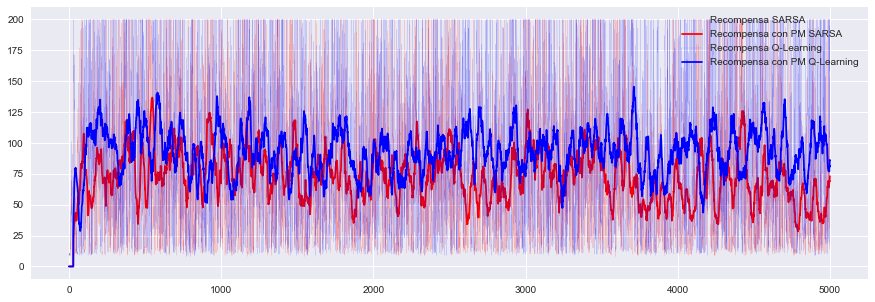

In [40]:
graficar_retornos(resultado_sarsa_cart,resultado_qlearning_cart,m=30, movil=True)

In [43]:
palito(Q_sarsa_cart, cart_env, rangos1)

Ahora, con los 8000 estados:

In [44]:
resultado_sarsa_cart, Q_sarsa_cart = entrenar_cart(alg="sarsa",n=1, env=cart_env, S=estados2, 
                           rangos=rangos2, A=np.arange(2), episodes=5000, alpha=0.8, 
                           gamma = 0.95, epsilon=0.05, seed=10)

Entrenamiento: 1


In [45]:
resultado_qlearning_cart, Q_qlearning_cart = entrenar_cart(alg="qlearning",n=1, env=cart_env, S=estados2, 
                           rangos=rangos2, A=np.arange(2), episodes=5000, alpha=0.8, 
                           gamma = 0.95, epsilon=0.05, seed=10)

Entrenamiento: 1


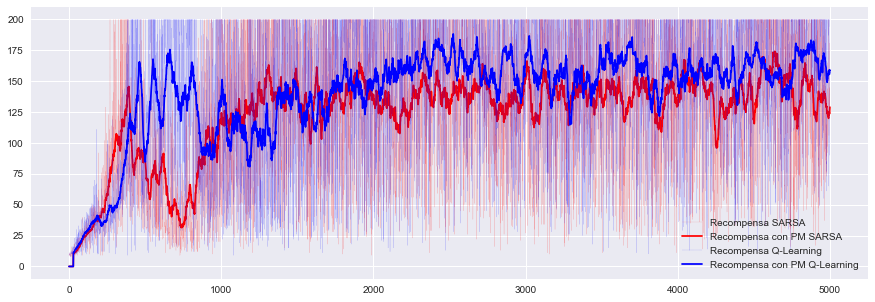

In [46]:
graficar_retornos(resultado_sarsa_cart,resultado_qlearning_cart,m=30, movil=True)

In [47]:
palito(Q_sarsa_cart, cart_env, rangos2)

De este modo, se puede observar que tanto con un espacio de estados menor a 200 como con un espacio de estados mayor a 2,000 estados el CartPole tiene un mejor desempeño para \textit{QLearning}. Concretamente, el  desempeño es mejor con un espacio de estados mayor a 2,000 y se demora alrededor de 175 pasos antes de caerse. Sin embargo,el desempeño para \textit{SARSA} bajo este escenario también mejora de manera bastante notoria. 


Finalmente, se tiene el [video del funcionamiento de CartPole](https://youtu.be/rPpvTjqyEbA).